In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [512]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/MARUTI.csv")

In [513]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [514]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4427 non-null   object 
 1   Symbol              4427 non-null   object 
 2   Series              4427 non-null   object 
 3   Prev Close          4427 non-null   float64
 4   Open                4427 non-null   float64
 5   High                4427 non-null   float64
 6   Low                 4427 non-null   float64
 7   Last                4427 non-null   float64
 8   Close               4427 non-null   float64
 9   VWAP                4427 non-null   float64
 10  Volume              4427 non-null   int64  
 11  Turnover            4427 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4426 non-null   float64
 14  %Deliverble         4426 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 518.9

In [515]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4.427000e+03,4.427000e+03,2456.000000,4.426000e+03,4426.000000
mean,2923.575085,2927.873074,2962.918432,2889.128066,2924.651604,2925.005094,2926.480642,1.194661e+06,2.395307e+14,55428.511808,3.627677e+05,0.387391
std,2740.532701,2745.541243,2769.986950,2715.403311,2740.438635,2740.723734,2742.675329,1.637957e+06,2.935761e+14,44405.350898,3.681484e+05,0.157139
min,125.000000,164.000000,168.700000,155.000000,164.000000,164.300000,165.060000,2.279600e+04,2.131518e+12,1096.000000,4.896000e+03,0.034300
25%,822.525000,825.100000,840.000000,806.300000,823.025000,822.700000,823.435000,4.263710e+05,6.248277e+13,23089.500000,1.620018e+05,0.267600
50%,1412.450000,1414.000000,1432.000000,1390.350000,1412.200000,1412.600000,1412.210000,6.909590e+05,1.121591e+14,44031.500000,2.717160e+05,0.389900
75%,5097.350000,5100.000000,5192.050000,5006.025000,5104.500000,5104.200000,5114.920000,1.208280e+06,3.141731e+14,73714.500000,4.480182e+05,0.500900
max,9832.450000,9966.000000,9996.400000,9725.000000,9846.000000,9832.450000,9850.960000,3.516428e+07,4.878992e+15,407715.000000,8.537695e+06,1.000000


In [516]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [517]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [518]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [519]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [520]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [521]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [522]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4422,2.863636,-0.766793,6638.90,937344,NaN
4423,2.552736,-1.517253,6568.75,1610651,NaN
4424,1.604278,0.076879,6573.80,1406270,NaN
4425,1.456807,-1.045215,6565.65,757075,NaN
4426,2.158542,-1.245965,6455.65,849997,NaN


In [523]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [524]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [525]:
#Define the prediction model
model = RandomForestRegressor()

In [526]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [527]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9842407526220599


In [528]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [529]:
predictions = model.predict(X_Check)

In [530]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

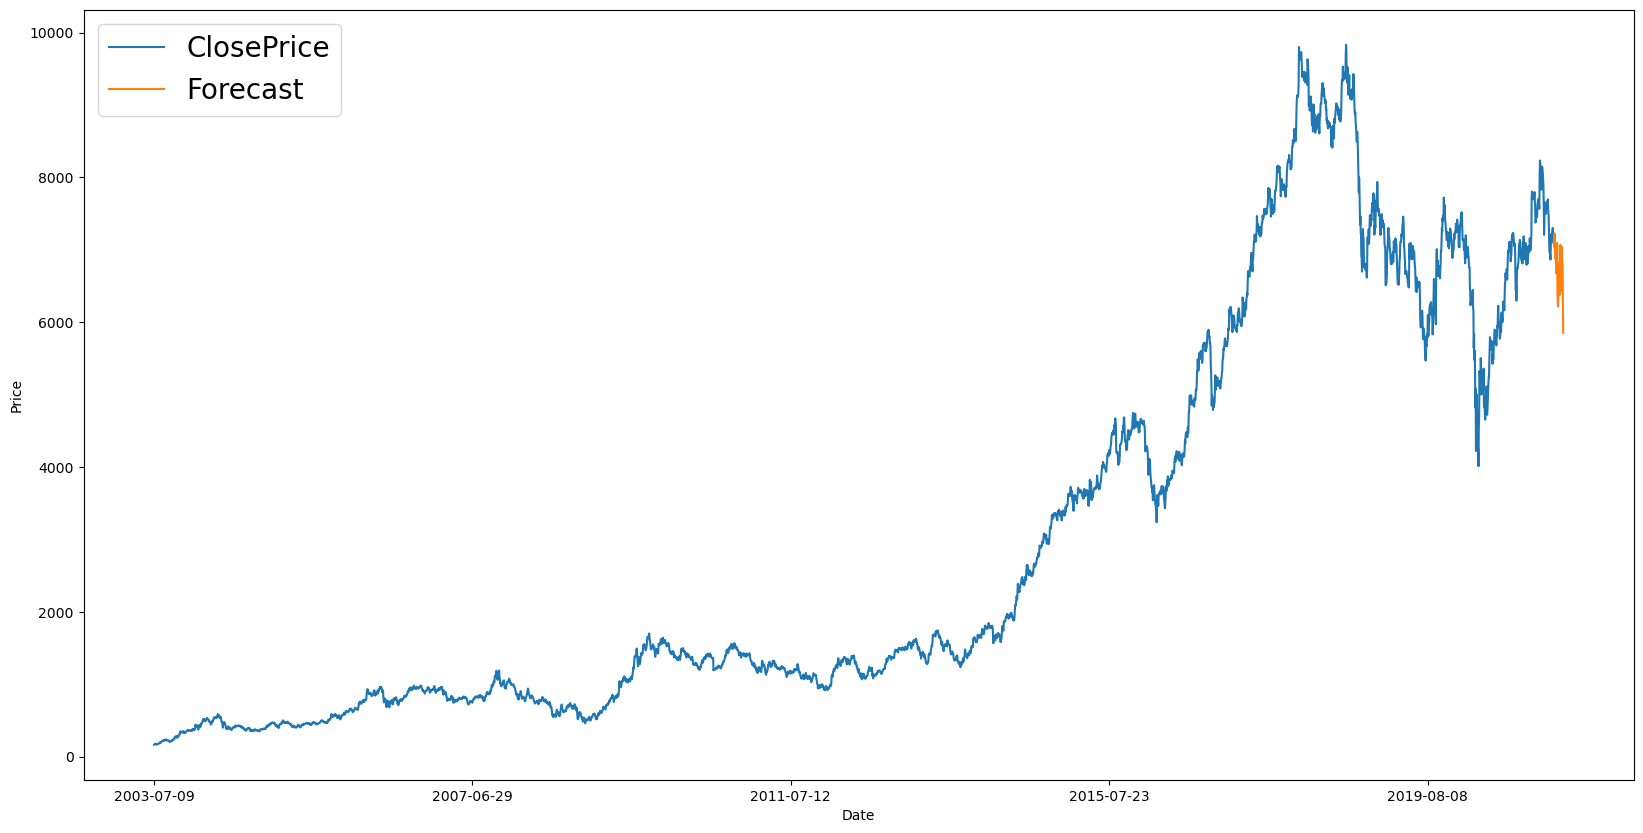

In [531]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')